In [235]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import *
import numpy as np

In [183]:
url = 'http://www.sharecsv.com/dl/34750eae35fa6b22ac2e32b952d1906d/day.csv'
day = pd.read_csv(url)

In [184]:
#EDA
day
len(day)

day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [185]:
del day['instant']
del day['dteday']

In [186]:
day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


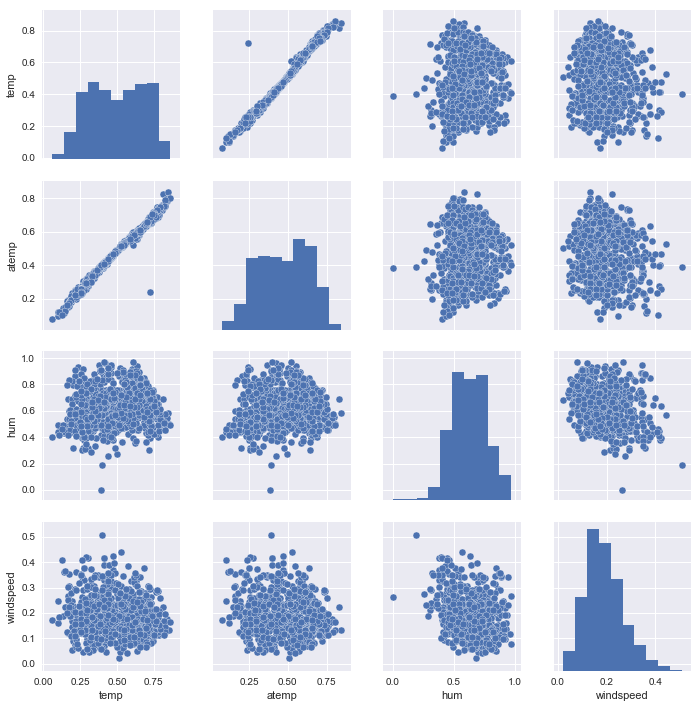

In [187]:
sb.set()
sb_weather = day.ix[:,7:11]
sb.pairplot(sb_weather)
sb.plt.show()


In [188]:
sb_weather

,temp,atemp,hum,windspeed
0,0.344167,0.363625,0.805833,0.160446
1,0.363478,0.353739,0.696087,0.248539
2,0.196364,0.189405,0.437273,0.248309
3,0.200000,0.212122,0.590435,0.160296
4,0.226957,0.229270,0.436957,0.186900
5,0.204348,0.233209,0.518261,0.089565
6,0.196522,0.208839,0.498696,0.168726
7,0.165000,0.162254,0.535833,0.266804
8,0.138333,0.116175,0.434167,0.361950
9,0.150833,0.150888,0.482917,0.223267


In [189]:
del day['temp']

C:\Users\palas\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


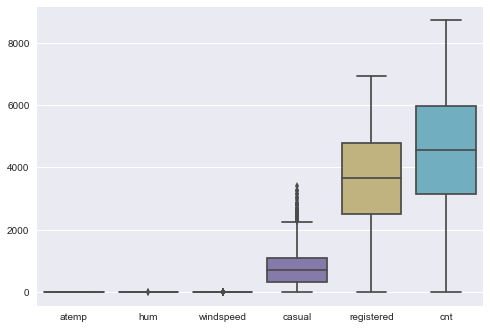

In [190]:
sb.boxplot(day.ix[:,7:13], orient='v')
sb.plt.show()

In [192]:
del day['mnth']
del day['weekday']
del day['casual']
del day['registered']

In [193]:
day = pd.concat([pd.get_dummies(day['season'], prefix="season"), 
                 day.ix[:,1:4], 
                 pd.get_dummies(day['weathersit'], prefix="weathersit"), 
                 day.ix[:,5:]
                ], 
                axis=1)
print(list(day))

['season_1', 'season_2', 'season_3', 'season_4', 'yr', 'holiday', 'workingday', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'atemp', 'hum', 'windspeed', 'cnt']


In [194]:
train, test = train_test_split(day, test_size=0.30, random_state=42)

In [195]:
print("Train: ", len(train), " rows", "\n", "Test: ", len(test), " rows")

Train:  511  rows 
 Test:  220  rows


In [197]:
ols = linear_model.LinearRegression()
ols.fit(train.ix[:,0:13], train.ix[:,13])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
lasso = linear_model.Lasso()
lasso.fit(train.ix[:,0:13], train.ix[:,13])


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [199]:
tree1 = tree.DecisionTreeRegressor(max_depth=10)
tree1.fit(train.ix[:,0:13], train.ix[:,13])

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [200]:
ols_pred_train = ols.predict(train.ix[:,0:13])
ols_pred_test = ols.predict(test.ix[:,0:13])

In [201]:
lasso_pred_train = lasso.predict(train.ix[:,0:13])
lasso_pred_test = lasso.predict(test.ix[:,0:13])

In [202]:
tree_pred_train = tree1.predict(train.ix[:,0:13])
tree_pred_test = tree1.predict(test.ix[:,0:13])

In [206]:
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

print("Explained Variance Score: \n")
print("OLS Model, In-sample Prediction: ", evs(train.ix[:,13], ols_pred_train))
print("OLS Model, Out-sample Prediction: ", evs(test.ix[:,13], ols_pred_test))
print("Lasso Model, In-sample Prediction: ", evs(train.ix[:,13], lasso_pred_train))
print("Lasso Model, Out-sample Prediction: ", evs(test.ix[:,13], lasso_pred_test))
print("Decision Tree, In-sample Prediction: ", evs(train.ix[:,13], tree_pred_train))
print("Decision Tree, Out-sample Prediction: ", evs(test.ix[:,13], tree_pred_test))

print("\n \n Mean Squared Error: \n")
print("OLS Model, In-sample Prediction: ", mse(train.ix[:,13], ols_pred_train))
print("OLS Model, Out-sample Prediction: ", mse(test.ix[:,13], ols_pred_test))
print("Lasso Model, In-sample Prediction: ", mse(train.ix[:,13], lasso_pred_train))
print("Lasso Model, Out-sample Prediction: ", mse(test.ix[:,13], lasso_pred_test))
print("Decision Tree, In-sample Prediction: ", mse(train.ix[:,13], tree_pred_train))
print("Decision Tree, Out-sample Prediction: ", mse(test.ix[:,13], tree_pred_test))

print("\n \n R-squred for GLMs: \n")
print("OLS: ", r2(train.ix[:,13], ols_pred_train))
print("Lasso: ", r2(train.ix[:,13], lasso_pred_train))


Explained Variance Score: 

OLS Model, In-sample Prediction:  0.810603724261
OLS Model, Out-sample Prediction:  0.836254269267
Lasso Model, In-sample Prediction:  0.810460286414
Lasso Model, Out-sample Prediction:  0.835618788883
Decision Tree, In-sample Prediction:  0.974580095449
Decision Tree, Out-sample Prediction:  0.797624582492

 
 Mean Squared Error: 

OLS Model, In-sample Prediction:  689194.795302
OLS Model, Out-sample Prediction:  653850.713504
Lasso Model, In-sample Prediction:  689716.751804
Lasso Model, Out-sample Prediction:  656257.476774
Decision Tree, In-sample Prediction:  92500.5829475
Decision Tree, Out-sample Prediction:  805510.46711

 
 R-squred for GLMs: 

OLS:  0.810603724261
Lasso:  0.810460286414


In [209]:
from sklearn.model_selection import cross_val_score
ols = linear_model.LinearRegression()
ols.fit(day.ix[:,0:13], day.ix[:,13])
scores = cross_val_score(ols, day.ix[:,0:13], day.ix[:,13], cv=5)
scores

array([ 0.757441  , -0.20113278,  0.65009879,  0.18938402,  0.5894611 ])

In [210]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.40 (+/- 0.71)


In [211]:
lasso = linear_model.Lasso()
lasso.fit(day.ix[:,0:13], day.ix[:,13])
scores = cross_val_score(lasso, day.ix[:,0:13], day.ix[:,13], cv=5)
scores

array([ 0.76314245, -0.1791738 ,  0.64610009,  0.18263635,  0.602101  ])

In [212]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.40 (+/- 0.70)


In [225]:
tree1 = tree.DecisionTreeRegressor(max_depth=10)
tree1.fit(day.ix[:,0:13], day.ix[:,13])
scores = cross_val_score(tree1, day.ix[:,0:13], day.ix[:,13], cv=5)
scores

array([ 0.20542121, -0.69482422, -0.6397277 , -0.42303527,  0.34709859])

In [214]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.31 (+/- 1.10)


In [236]:
loo = cross_validation.LeaveOneOut(len(day.ix[:,13]))

ols_loo = linear_model.LinearRegression()
ols_loo.fit(day.ix[:,0:13], day.ix[:,13])
scores = cross_val_score(ols_loo,np.array(day.ix[:,0:13]), np.array(day.ix[:,13]), cv=loo,)

# This will print the mean of the list of errors that were output and 
# provide your metric for evaluation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.00 (+/- 0.00)


In [241]:
param_grid = {'max_depth': np.arange(3, 20)}

tree = model_selection.GridSearchCV(tree.DecisionTreeRegressor(), param_grid)
tree1.fit(train.ix[:,0:13], train.ix[:,13])

tree_pred_test = tree1.predict(test.ix[:,0:13])
tree_performance = evs(test.ix[:,13], tree_pred_test)

print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

grid_search


AttributeError: 'GridSearchCV' object has no attribute 'DecisionTreeRegressor'

In [245]:
def run_gridsearch(X, y, clf, param_grid, cv=5):
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\n Grid Search Results.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

tree1 = tree.DecisionTreeRegressor()
run_gridsearch(train.ix[:,0:13],  train.ix[:,13], tree1, param_grid, cv=10)

AttributeError: 'GridSearchCV' object has no attribute 'DecisionTreeRegressor'